In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import pingouin as pg
from nilearn import plotting

from src import data

%matplotlib widget

!date -I

2024-03-14


TODO: https://sociograph.blogspot.com/2012/11/visualizing-adjacency-matrices-in-python.html, https://stackoverflow.com/questions/67946418/how-to-add-rectangle-patches-in-python-heatmap

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]

### Load structural (and functional) connectivity data

In [3]:
SC_W, SC_L, _ = data.load_pytepfit_sc()
SC_W_ENIGMA, _, FC_ENIGMA = data.load_enigma(parcellation="schaefer_200",reoreder='PyTepFit')
SC_L_ENIGMA = np.where(SC_W_ENIGMA>0,1/SC_W_ENIGMA,np.nan)
SC_W_dom, SC_L_dom, FC_dom = data.load_domhof_for_pytepfit()

/tmp/ipykernel_11045/848260326.py:3: RuntimeWarning: divide by zero encountered in divide
  SC_L_ENIGMA = np.where(SC_W_ENIGMA>0,1/SC_W_ENIGMA,np.nan)


# Euclidean distance

In [4]:
centroids_file = data.path('external/schaefer_parcellation_centroids/ROI_MAPPING_pytepfit.csv')
centroids_mne = data.get_centroids_from_file(centroids_file,"geom_mne")
centroids_csv = data.get_centroids_from_file(centroids_file,"geom_csv")

ED_mne = data.roi_distances_from_centroids(centroids_mne)
ED_csv = data.roi_distances_from_centroids(centroids_csv)

Text(0.5, 1.0, 'official Schaefer centroids')

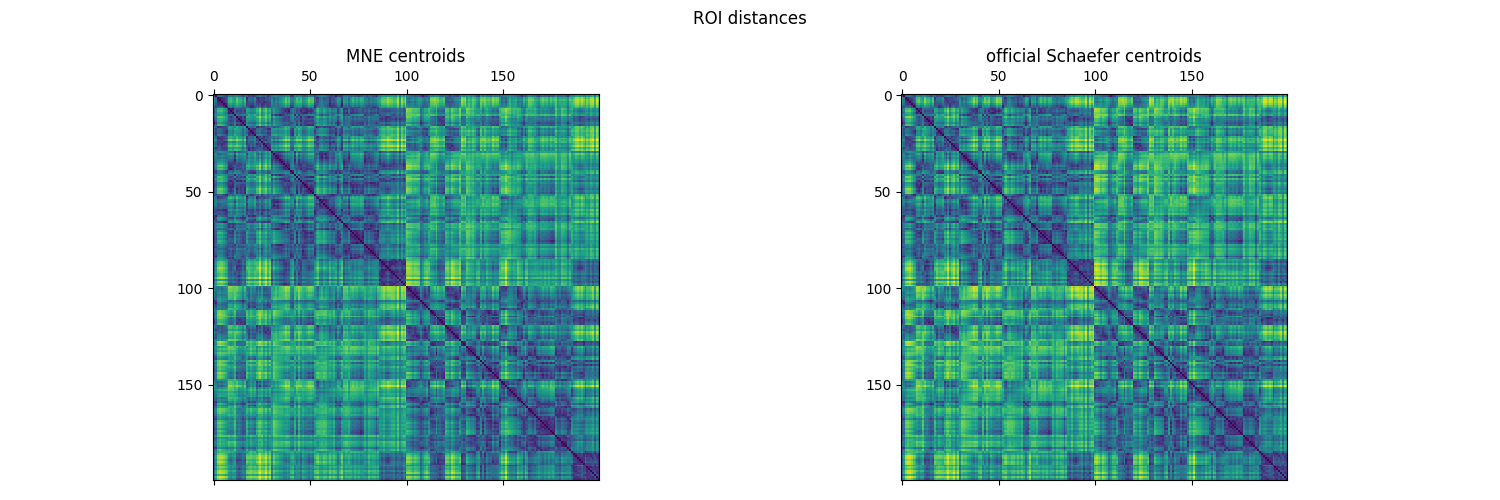

In [5]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
fig.suptitle("ROI distances")
axs[0].matshow(ED_mne)
axs[0].set_title("MNE centroids")
axs[1].matshow(ED_csv)
axs[1].set_title("official Schaefer centroids")

In [6]:
ED = pd.DataFrame({"MNE":ED_mne.flatten(),"Schaefer CSV":ED_csv.flatten()})
pg.pairwise_corr(ED,method="spearman")

X             Y    method alternative      n         r         CI95%  \
0  MNE  Schaefer CSV  spearman   two-sided  40000  0.988295  [0.99, 0.99]   

   p-unc  power  
0    0.0    1.0

In [7]:
pg.pairwise_corr(ED)

X             Y   method alternative      n         r         CI95%  \
0  MNE  Schaefer CSV  pearson   two-sided  40000  0.987821  [0.99, 0.99]   

   p-unc BF10  power  
0    0.0  nan    1.0

In [8]:

color_mapping = {'Default':'yellow', 'Limbic':'blue','SalVentAttn':'red',  'DorsAttn':'green','Vis':'purple','Cont':'orange', 'SomMot':'pink'}
ROI_colors = []

legend_patches = []
for c in color_mapping:
    legend_patches.append(mpatches.Patch(color=color_mapping[c], label=c))


labels = data.get_labels_from_file(centroids_file,"roi_name")

for l in labels:
    ROI_colors.append(color_mapping[l.split('_')[2]])

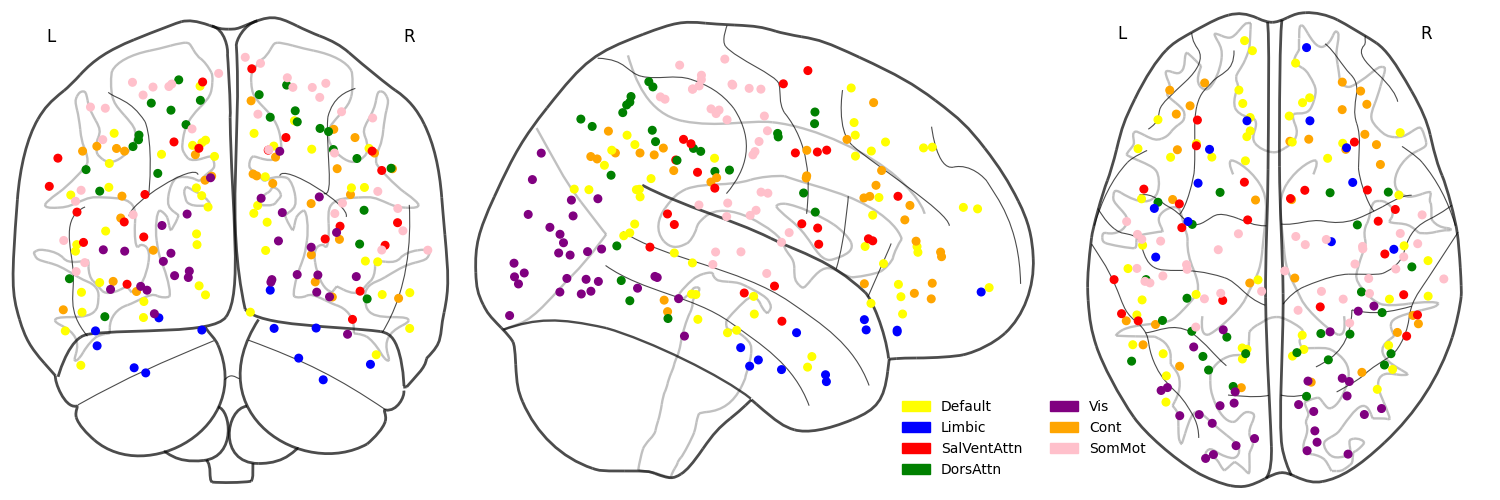

In [9]:
n_roi = len(centroids_mne)
zero_adjacency = np.zeros((n_roi,n_roi))

fig = plt.figure()
plt.legend(handles=legend_patches,loc='upper right', bbox_to_anchor=(0.835, 0.15, 0,0),frameon=False,ncols=2) # (x, y, width, height)

plt.box(False)
# Selecting the axis-X making the bottom and top axes False. 
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
  
# Selecting the axis-Y making the right and left axes False 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
  
# Iterating over all the axes in the figure 
# and make the Spines Visibility as False 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

plotting.plot_connectome(zero_adjacency,centroids_mne,node_size=30,figure=fig,node_color=ROI_colors)

# Structural connectivity - weights

/tmp/ipykernel_11045/3060652620.py:3: RuntimeWarning: divide by zero encountered in log
  axs[0].matshow(np.log(SC_W))
/tmp/ipykernel_11045/3060652620.py:5: RuntimeWarning: divide by zero encountered in log
  axs[1].matshow(np.log(SC_W_ENIGMA))
/tmp/ipykernel_11045/3060652620.py:5: RuntimeWarning: invalid value encountered in log
  axs[1].matshow(np.log(SC_W_ENIGMA))


Text(0.5, 1.0, 'Domhof')

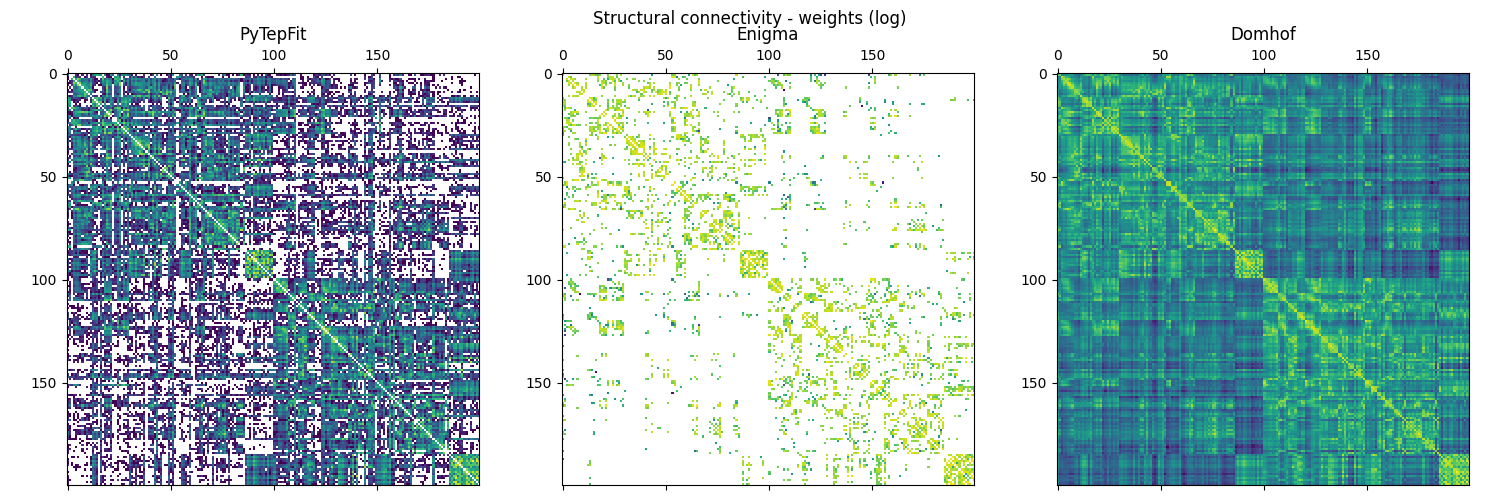

In [10]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
fig.suptitle("Structural connectivity - weights (log)")
axs[0].matshow(np.log(SC_W))
axs[0].set_title("PyTepFit")
axs[1].matshow(np.log(SC_W_ENIGMA))
axs[1].set_title("Enigma")
axs[2].matshow(np.log(SC_W_dom))
axs[2].set_title("Domhof")

In [11]:
SC_weights = pd.DataFrame({"PyTepFit":SC_W.flatten(),"Enigma":SC_W_ENIGMA.flatten(),"Domhof":SC_W_dom.flatten()})
pg.pairwise_corr(SC_weights,method="spearman")

X       Y    method alternative      n         r         CI95%  \
0  PyTepFit  Enigma  spearman   two-sided  40000  0.483942  [0.48, 0.49]   
1  PyTepFit  Domhof  spearman   two-sided  40000  0.834412  [0.83, 0.84]   
2    Enigma  Domhof  spearman   two-sided  40000  0.508299   [0.5, 0.52]   

   p-unc  power  
0    0.0    1.0  
1    0.0    1.0  
2    0.0    1.0

In [12]:
pg.pairwise_corr(SC_weights)

X       Y   method alternative      n         r         CI95%  \
0  PyTepFit  Enigma  pearson   two-sided  40000  0.520906  [0.51, 0.53]   
1  PyTepFit  Domhof  pearson   two-sided  40000  0.548002  [0.54, 0.55]   
2    Enigma  Domhof  pearson   two-sided  40000  0.431184  [0.42, 0.44]   

   p-unc BF10  power  
0    0.0  inf    1.0  
1    0.0  inf    1.0  
2    0.0  inf    1.0

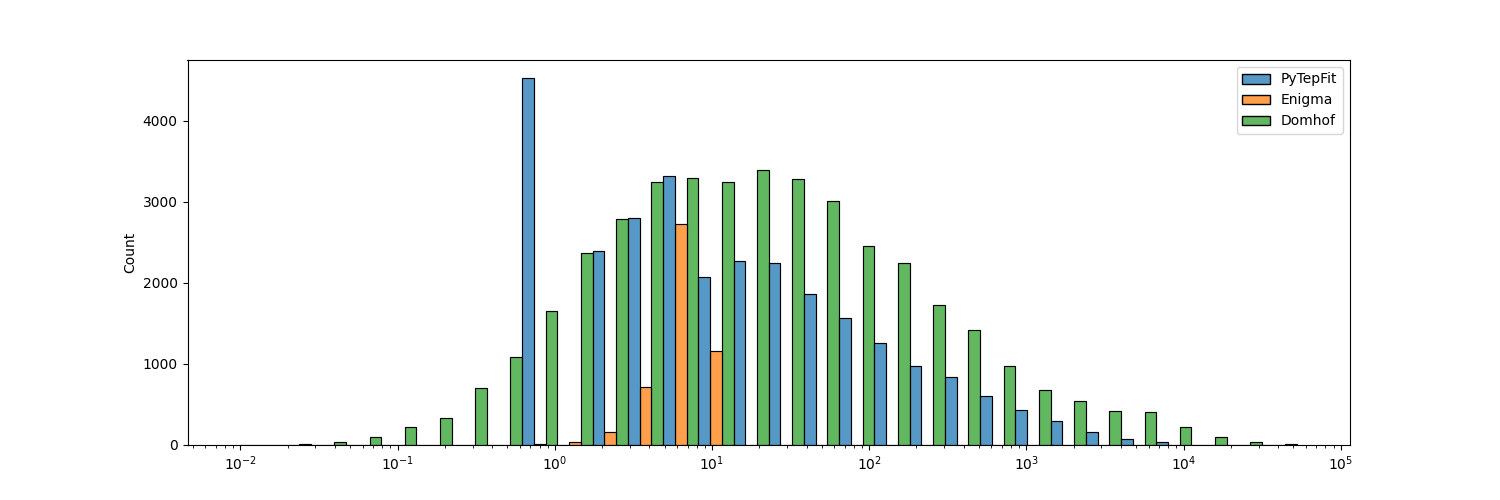

In [13]:
plt.figure()
sns.histplot(SC_weights,bins = 30, multiple="dodge",log_scale=True)
plt.show()

In [14]:
SC_W_pivot = data.find_pivot_to_keep_xpercent_edges(SC_W)
SC_W_dom_pivot = data.find_pivot_to_keep_xpercent_edges(SC_W_dom)
SC_W_ENIGMA_pivot = data.find_pivot_to_keep_xpercent_edges(SC_W_ENIGMA)

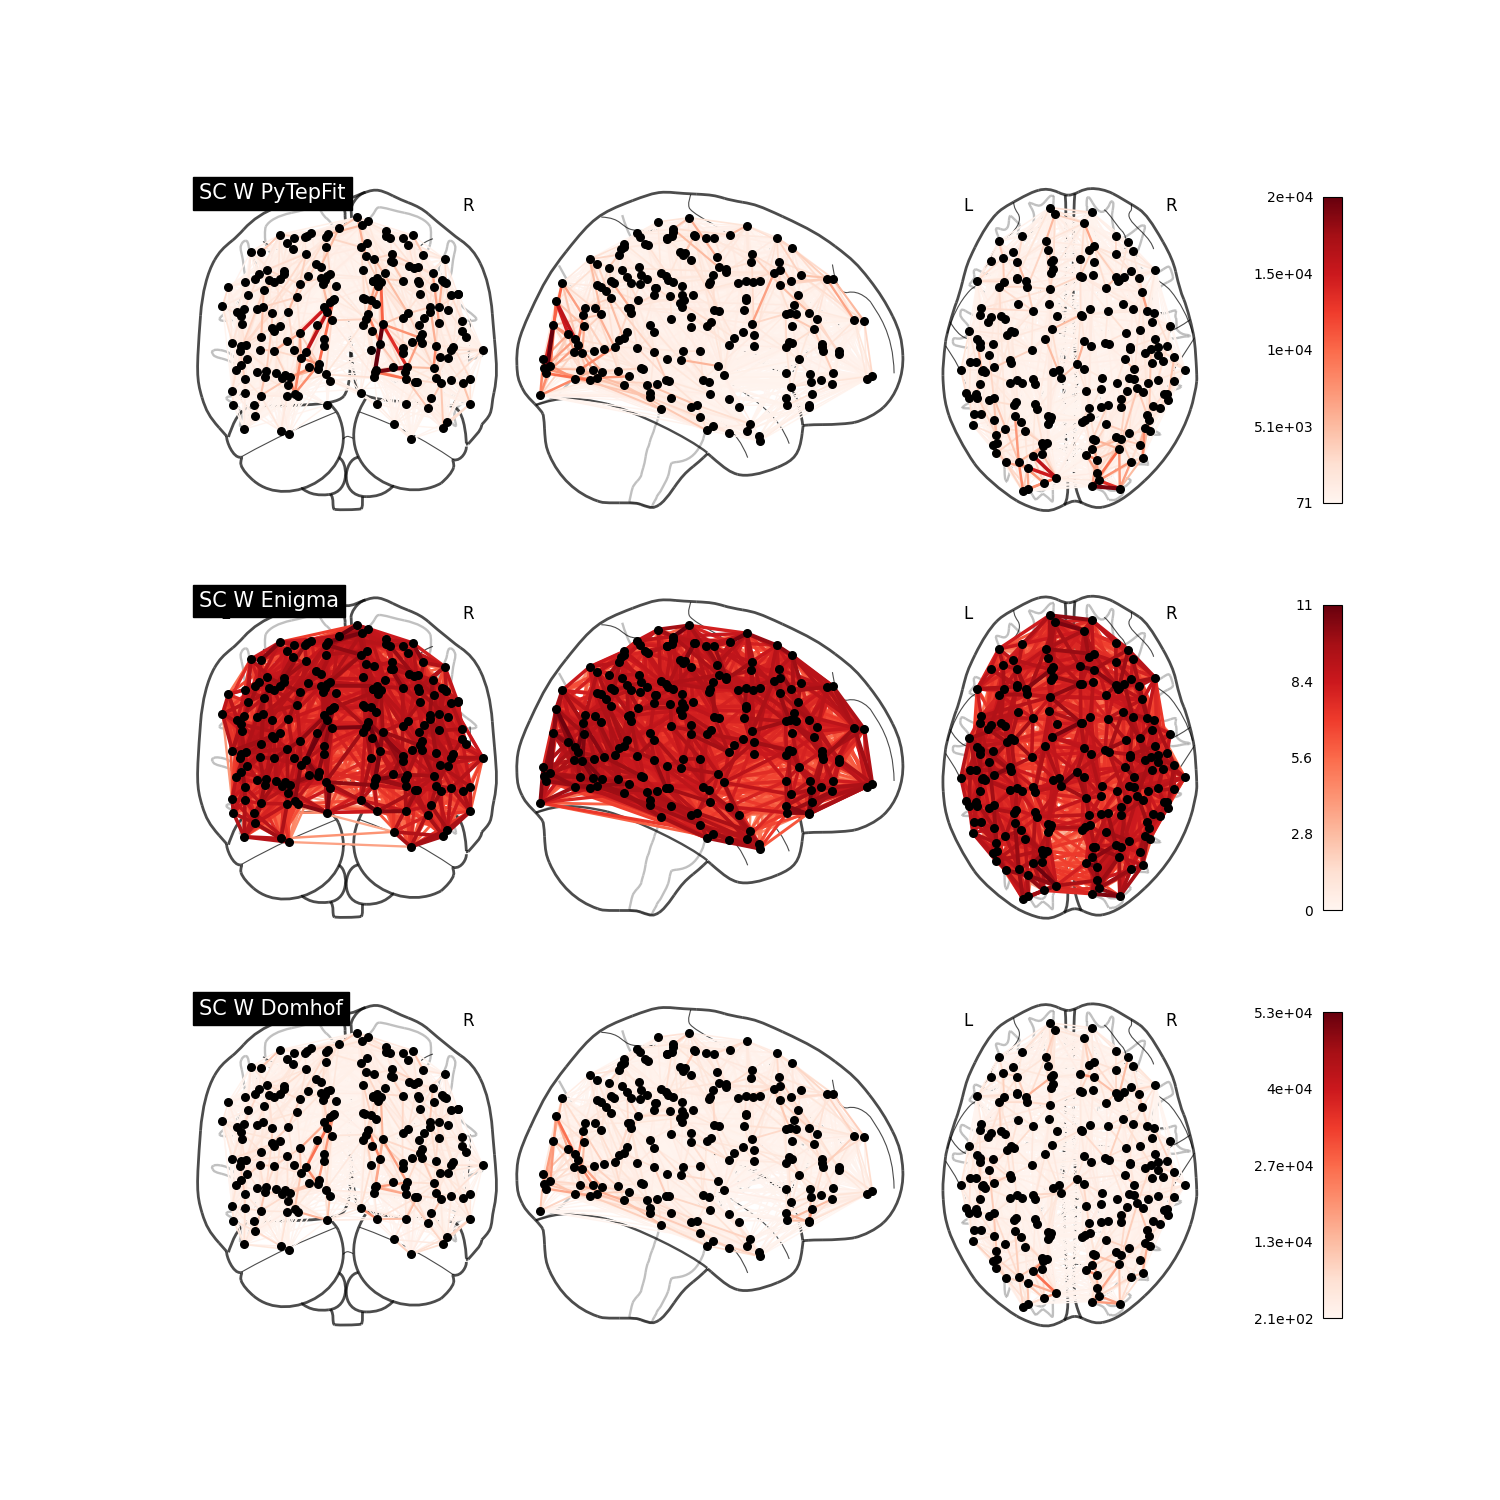

In [15]:
fig, ax= plt.subplots(3,1,figsize=(15,15))
plotting.plot_connectome(SC_W,centroids_mne,edge_threshold=SC_W_pivot,node_color="k",node_size=30,axes=ax[0],title="SC W PyTepFit",colorbar=True,edge_vmin=SC_W_pivot,edge_vmax=np.nanmax(SC_W,axis=None),edge_cmap='Reds')
plotting.plot_connectome(SC_W_ENIGMA,centroids_mne,edge_threshold=SC_W_ENIGMA_pivot,node_color="k",node_size=30,axes=ax[1],title="SC W Enigma",colorbar=True,edge_vmin=SC_W_ENIGMA_pivot,edge_vmax=np.nanmax(SC_W_ENIGMA,axis=None),edge_cmap='Reds')
plotting.plot_connectome(SC_W_dom,centroids_mne,edge_threshold=SC_W_dom_pivot,node_color="k",node_size=30,axes=ax[2],title="SC W Domhof",colorbar=True,edge_vmin=SC_W_dom_pivot,edge_vmax=np.nanmax(SC_W_dom,axis=None),edge_cmap='Reds')

# Structural connectivity - lengths

Text(0.5, 1.0, 'Domhof')

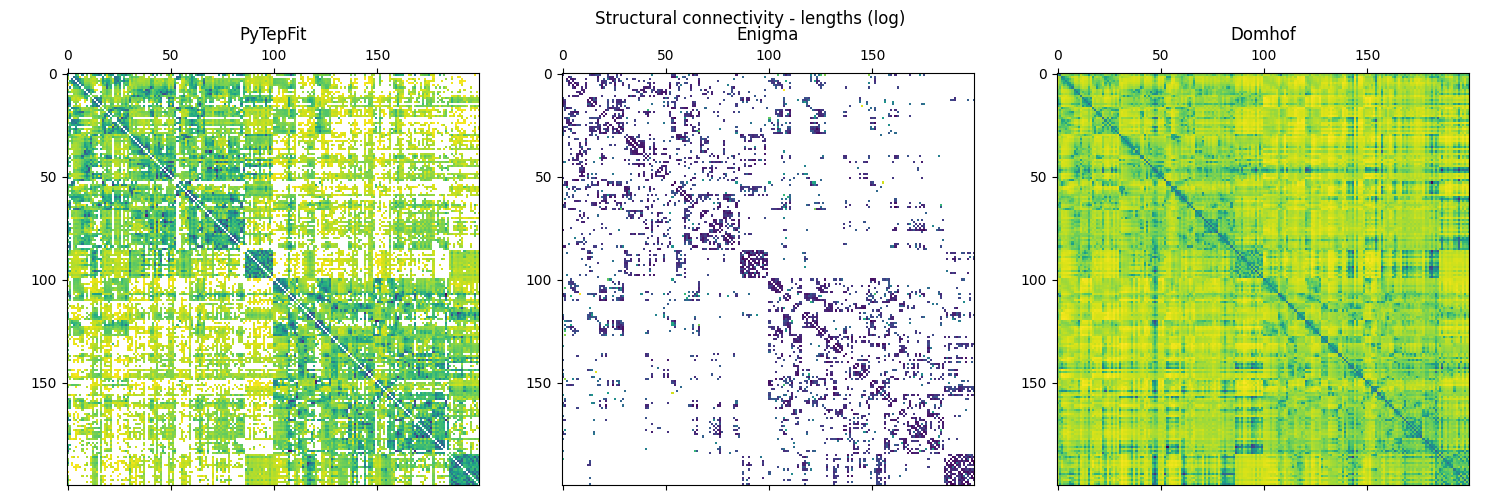

In [16]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
fig.suptitle("Structural connectivity - lengths (log)")
axs[0].matshow(np.log(SC_L))
axs[0].set_title("PyTepFit")
axs[1].matshow(np.log(SC_L_ENIGMA))
axs[1].set_title("Enigma")
axs[2].matshow(np.log(SC_L_dom))
axs[2].set_title("Domhof")

In [17]:
SC_lengths = pd.DataFrame({"PyTepFit":SC_L.flatten(),"Enigma":SC_L_ENIGMA.flatten(),"Domhof":SC_L_dom.flatten()})
pg.pairwise_corr(SC_lengths,method="spearman")

X       Y    method alternative      n         r         CI95%  \
0  PyTepFit  Enigma  spearman   two-sided   4722  0.573469  [0.55, 0.59]   
1  PyTepFit  Domhof  spearman   two-sided  27722  0.777570  [0.77, 0.78]   
2    Enigma  Domhof  spearman   two-sided   4806  0.598287  [0.58, 0.62]   

   p-unc  power  
0    0.0    1.0  
1    0.0    1.0  
2    0.0    1.0

In [18]:
pg.pairwise_corr(SC_lengths,method="pearson")

X       Y   method alternative      n         r         CI95%  \
0  PyTepFit  Enigma  pearson   two-sided   4722  0.301478  [0.28, 0.33]   
1  PyTepFit  Domhof  pearson   two-sided  27722  0.788650  [0.78, 0.79]   
2    Enigma  Domhof  pearson   two-sided   4806  0.277187   [0.25, 0.3]   

           p-unc       BF10  power  
0  8.331544e-100   7.65e+95    1.0  
1   0.000000e+00        inf    1.0  
2   1.662203e-85  4.159e+81    1.0

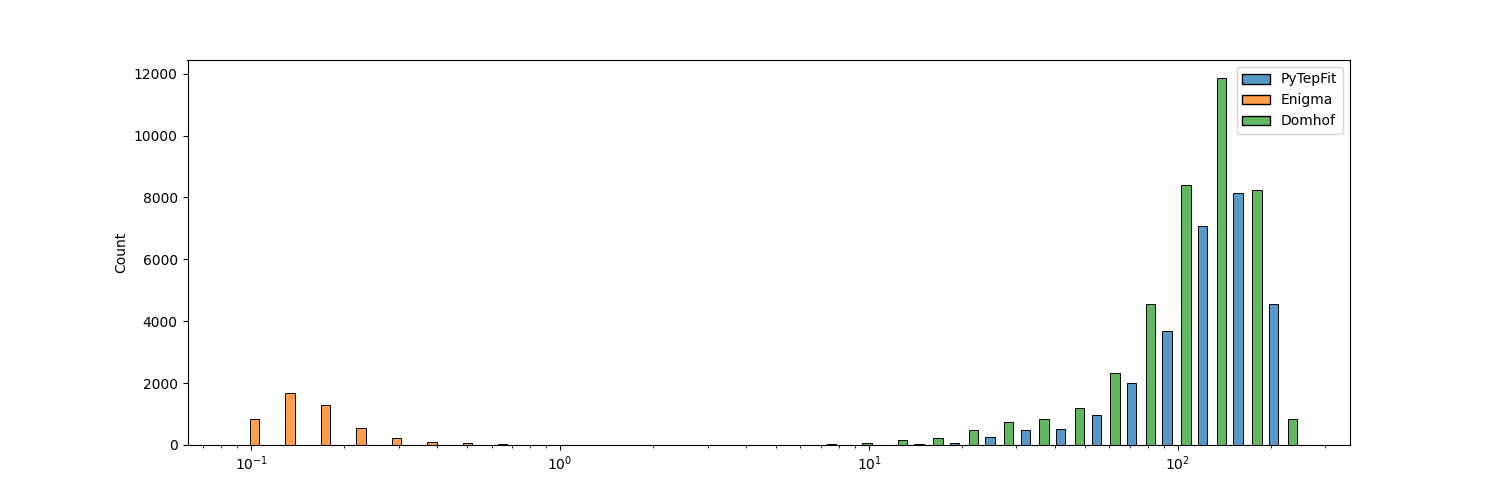

In [19]:
plt.figure()
sns.histplot(SC_lengths,bins = 30, multiple="dodge", shrink=.8,log_scale=True)
plt.show()

# Functional connectivity

Text(0.5, 1.0, 'Enigma')

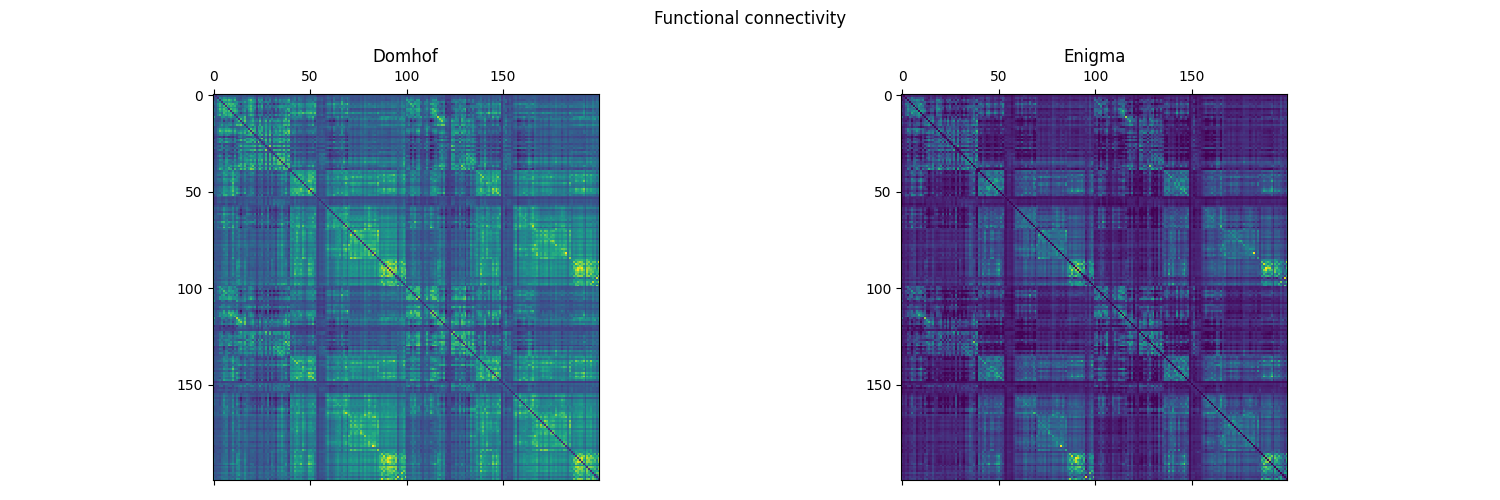

In [20]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
fig.suptitle("Functional connectivity")
axs[0].matshow(FC_dom)
axs[0].set_title("Domhof")
axs[1].matshow(FC_ENIGMA)
axs[1].set_title("Enigma")

In [21]:
FC = pd.DataFrame({"Enigma":FC_ENIGMA.flatten(),"Domhof":FC_dom.flatten()})
pg.pairwise_corr(FC,method="spearman")

X       Y    method alternative      n         r         CI95%  p-unc  \
0  Enigma  Domhof  spearman   two-sided  40000  0.921039  [0.92, 0.92]    0.0   

   power  
0    1.0

In [22]:
pg.pairwise_corr(FC)

X       Y   method alternative      n         r         CI95%  p-unc  \
0  Enigma  Domhof  pearson   two-sided  40000  0.921401  [0.92, 0.92]    0.0   

  BF10  power  
0  inf    1.0

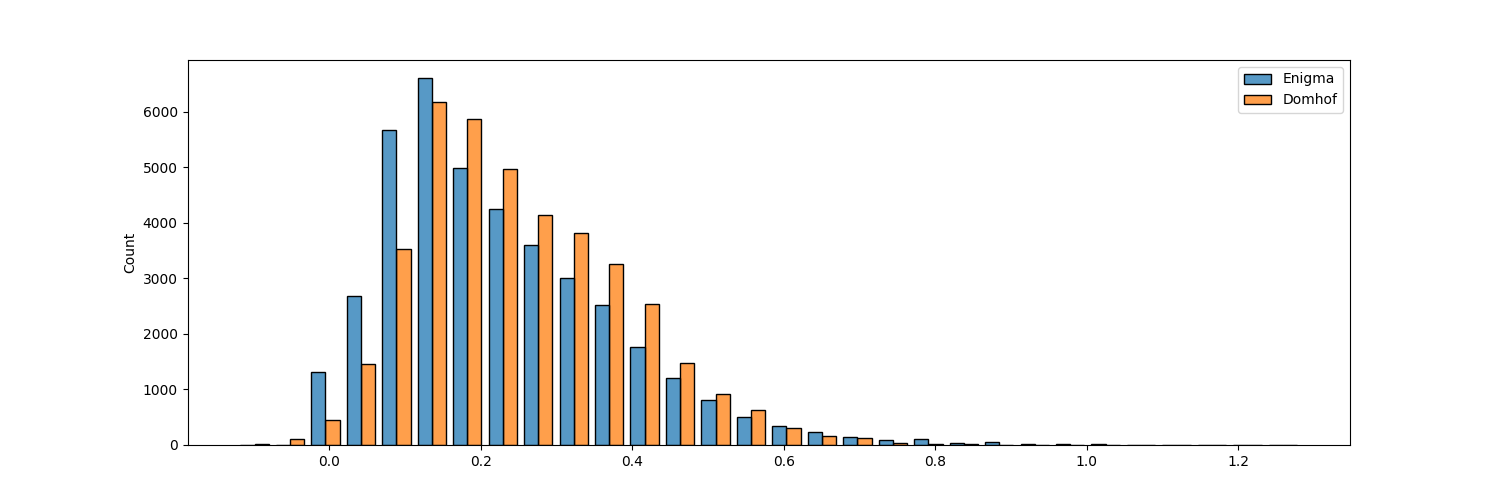

In [23]:
plt.figure()
sns.histplot(FC,bins = 30, multiple="dodge", shrink=.8)
plt.show()

In [24]:
pivot20_ENIGMA = data.find_pivot_to_keep_xpercent_edges(FC_ENIGMA,percent=0.8)
pivot20_dom = data.find_pivot_to_keep_xpercent_edges(FC_dom,percent=0.8)

FC_ENIGMA_20 = np.where(FC_ENIGMA > pivot20_ENIGMA,FC_ENIGMA,np.nan)
FC_dom_20 = np.where(FC_dom > pivot20_dom,FC_dom,np.nan)

Text(0.5, 1.0, 'Enigma')

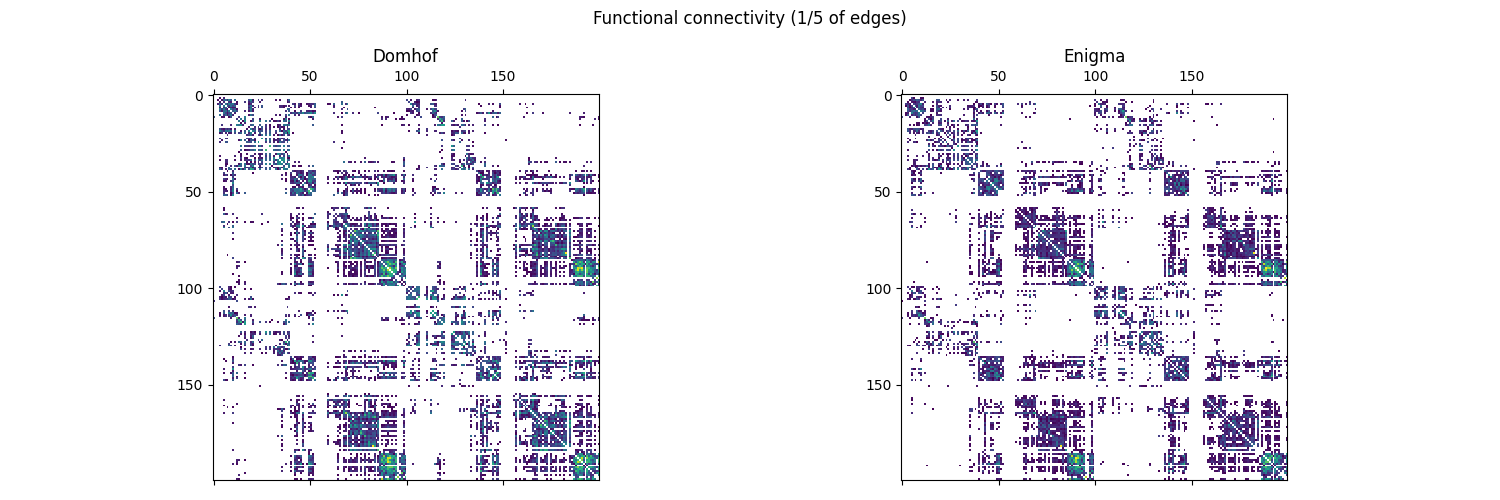

In [25]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
fig.suptitle("Functional connectivity (1/5 of edges)")
axs[0].matshow(FC_dom_20)
axs[0].set_title("Domhof")
axs[1].matshow(FC_ENIGMA_20)
axs[1].set_title("Enigma")

In [26]:
FC_20percent = pd.DataFrame({"Enigma":FC_ENIGMA_20.flatten(),"Domhof":FC_dom_20.flatten()})
pg.pairwise_corr(FC,method="spearman")

X       Y    method alternative      n         r         CI95%  p-unc  \
0  Enigma  Domhof  spearman   two-sided  40000  0.921039  [0.92, 0.92]    0.0   

   power  
0    1.0

In [27]:
pg.pairwise_corr(FC)

X       Y   method alternative      n         r         CI95%  p-unc  \
0  Enigma  Domhof  pearson   two-sided  40000  0.921401  [0.92, 0.92]    0.0   

  BF10  power  
0  inf    1.0

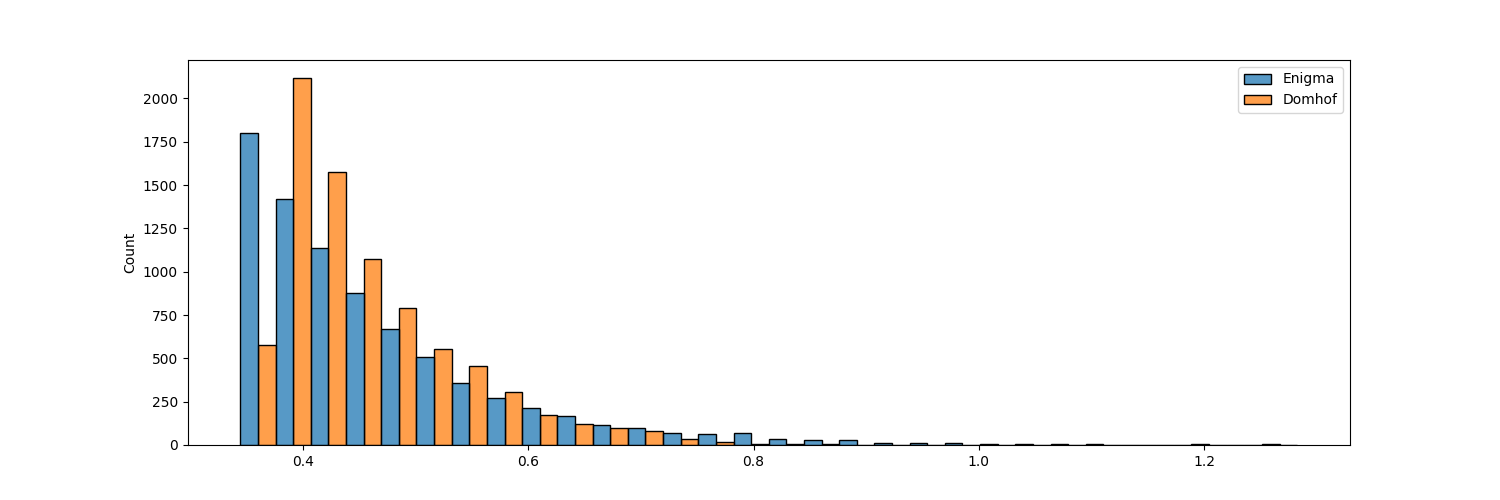

In [28]:
plt.figure()
sns.histplot(FC_20percent,bins = 30, multiple="dodge")
plt.show()

In [29]:
minimum = FC_20percent.min(axis=None)
maximum = FC_20percent.max(axis=None)

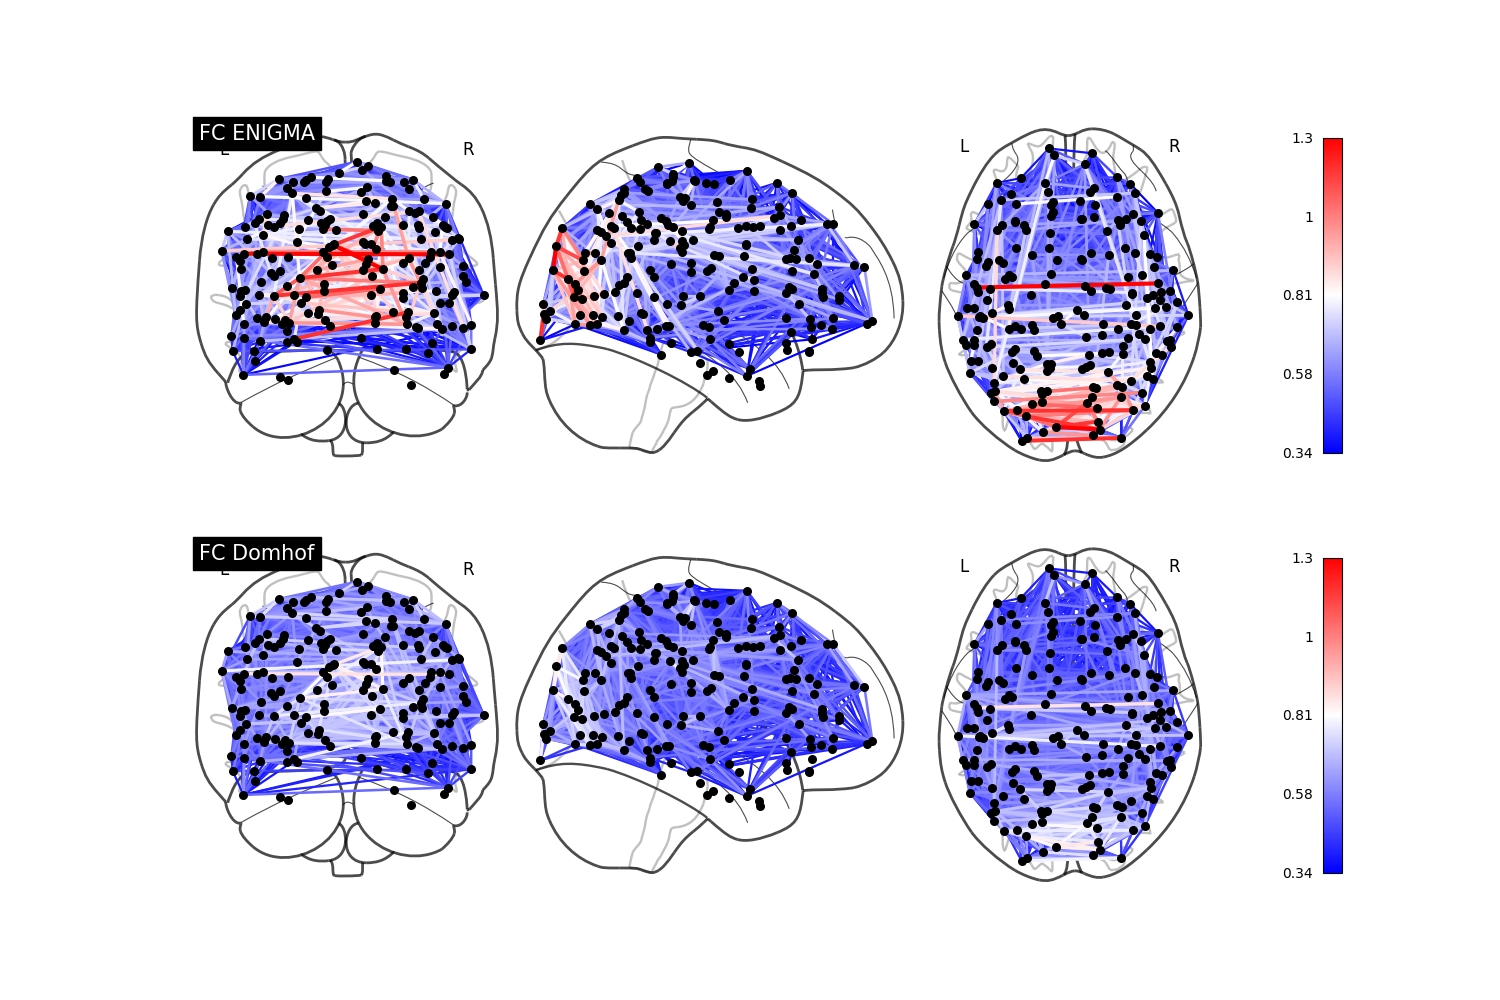

In [30]:
fig, ax= plt.subplots(2,1,figsize=(15,10))
plotting.plot_connectome(FC_ENIGMA_20,centroids_mne,node_color="k",node_size=30,axes=ax[0],edge_vmin=minimum, edge_vmax=maximum,title="FC ENIGMA",colorbar=True)
plotting.plot_connectome(FC_dom_20,centroids_mne,node_color="k",node_size=30,axes=ax[1],edge_vmin=minimum, edge_vmax=maximum,title="FC Domhof",colorbar=True)